
## Pipeline
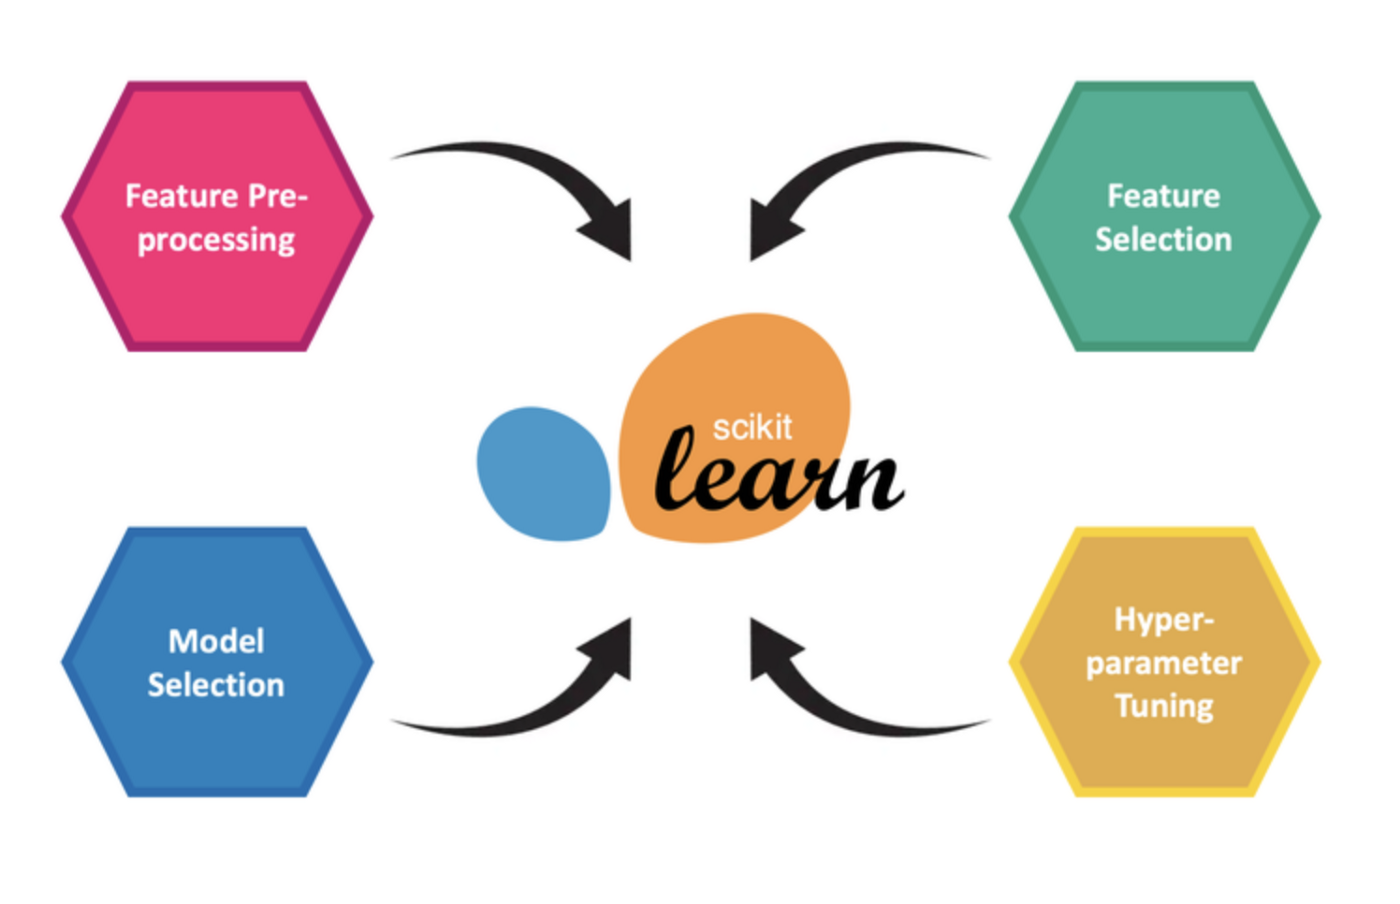

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

D:\UserFiles\anaconda\envs\ia\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\UserFiles\anaconda\envs\ia\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
D:\UserFiles\anaconda\envs\ia\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Como montar un pipeline



In [21]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 * X**2 + X + 2 + np.random.randn(m, 1)
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
y_new_true = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


(array([ 7.,  9., 15.,  7.,  9.,  6., 16., 10.,  8., 13.]),
 array([-2.94103014, -2.3555466 , -1.77006305, -1.1845795 , -0.59909596,
        -0.01361241,  0.57187113,  1.15735468,  1.74283823,  2.32832177,
         2.91380532]),
 <BarContainer object of 10 artists>)

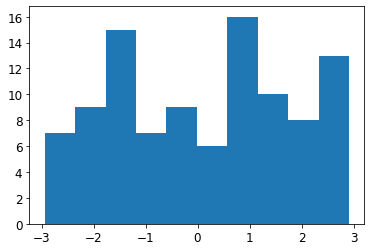

In [22]:
plt.hist(X)

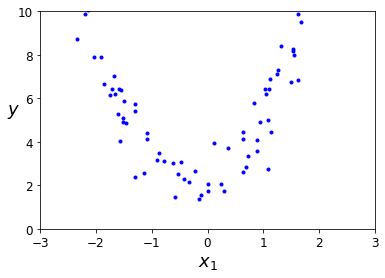

In [23]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline


In [8]:
polybig_features = PolynomialFeatures(degree=10, include_bias=False)


In [9]:
X[:5]

array([[-1.93126681],
       [-1.2969493 ],
       [ 2.86748477],
       [ 1.24352837],
       [-1.1745358 ]])

In [10]:
X_sca=polybig_features.fit_transform(X)

In [11]:
X_sca[:5,:]

array([[-1.93126681e+00,  3.72979147e+00, -7.20322246e+00,
         1.39113444e+01, -2.68665177e+01,  5.18864138e+01,
        -1.00206509e+02,  1.93525504e+02, -3.73749381e+02,
         7.21809774e+02],
       [-1.29694930e+00,  1.68207749e+00, -2.18156923e+00,
         2.82938469e+00, -3.66956850e+00,  4.75924430e+00,
        -6.17249858e+00,  8.00541773e+00, -1.03826209e+01,
         1.34657330e+01],
       [ 2.86748477e+00,  8.22246893e+00,  2.35778045e+01,
         6.76089954e+01,  1.93867765e+02,  5.55912864e+02,
         1.59407167e+03,  4.57097626e+03,  1.31072048e+04,
         3.75847103e+04],
       [ 1.24352837e+00,  1.54636280e+00,  1.92294601e+00,
         2.39123792e+00,  2.97357218e+00,  3.69772136e+00,
         4.59822141e+00,  5.71801877e+00,  7.11051855e+00,
         8.84213153e+00],
       [-1.17453580e+00,  1.37953435e+00, -1.62031248e+00,
         1.90311502e+00, -2.23527673e+00,  2.62541254e+00,
        -3.08364102e+00,  3.62184678e+00, -4.25398871e+00,
         4.

In [24]:
std_scaler = StandardScaler()
lin_reg = LinearRegression()

In [25]:
polynomial_regression = Pipeline([('poly_features',PolynomialFeatures(degree=10, include_bias=False)),
         ('std_scal',StandardScaler()),
                                  ('lin_reg',LinearRegression())
        ])
polynomial_regression.fit(X,y)
y_new_regul = polynomial_regression.predict(X_new)
    

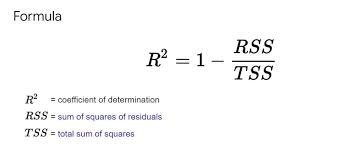

In [26]:
polynomial_regression.score(X,y)

0.9714021545812439

(-3.0, 3.0, 0.0, 20.0)

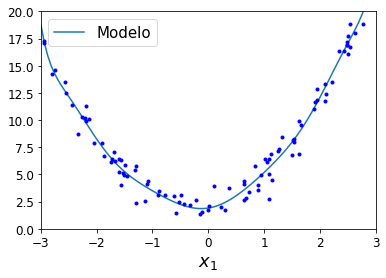

In [27]:
plt.plot(X_new, y_new_regul,  label=r"Modelo")
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left", fontsize=15)
plt.xlabel("$x_1$", fontsize=18)
plt.axis([-3, 3, 0, 20])


In [28]:
from sklearn.model_selection import GridSearchCV


In [29]:
 param_grid = dict(poly_features__degree=[2,3,4,5,6,10])


In [30]:
grid_search = GridSearchCV(polynomial_regression, param_grid=param_grid)

In [31]:
grid_search.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('poly_features',
                                        PolynomialFeatures(degree=10,
                                                           include_bias=False)),
                                       ('std_scal', StandardScaler()),
                                       ('lin_reg', LinearRegression())]),
             param_grid={'poly_features__degree': [2, 3, 4, 5, 6, 10]})

In [32]:
grid_search.best_params_

{'poly_features__degree': 2}

In [33]:
grid_search.score(X, y)

0.97051504226099

In [34]:
y_new_gs=grid_search.predict(X_new)

In [35]:


grid_search.cv_results_

{'mean_fit_time': array([0.00259976, 0.00179944, 0.00139995, 0.00139947, 0.00160046,
        0.00179939]),
 'std_fit_time': array([0.00079945, 0.00039988, 0.00048992, 0.00049031, 0.00080029,
        0.00074828]),
 'mean_score_time': array([0.00079808, 0.00060005, 0.00060091, 0.00080142, 0.00060091,
        0.00040073]),
 'std_score_time': array([0.00039905, 0.00048994, 0.00049065, 0.00040071, 0.00049064,
        0.0004908 ]),
 'param_poly_features__degree': masked_array(data=[2, 3, 4, 5, 6, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'poly_features__degree': 2},
  {'poly_features__degree': 3},
  {'poly_features__degree': 4},
  {'poly_features__degree': 5},
  {'poly_features__degree': 6},
  {'poly_features__degree': 10}],
 'split0_test_score': array([0.96636276, 0.96401435, 0.96399339, 0.9642201 , 0.9645259 ,
        0.96349457]),
 'split1_test_score': array([0.96283859, 0.95889179, 0.95888222, 0.95

(-3.0, 3.0, 0.0, 20.0)

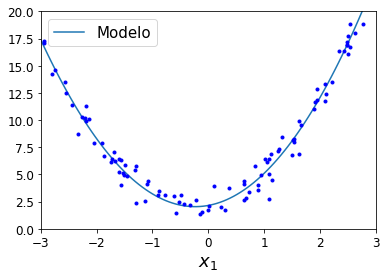

In [36]:
plt.plot(X_new, y_new_gs,  label=r"Modelo")
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left", fontsize=15)
plt.xlabel("$x_1$", fontsize=18)
plt.axis([-3, 3, 0, 20])